In [4]:
#import libraries
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns

#load the data
data=pd.read_csv('/workspaces/FilmPermitsAnalysis-repo/Film_Permits.csv')
data.head()

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s)
0,728964,Theater Load in and Load Outs,07/08/2023 07:00:00 AM,07/10/2023 01:00:00 PM,07/06/2023 05:17:06 PM,"Mayor's Office of Film, Theatre & Broadcasting",ATLANTIC AVENUE between FORT GREENE PLACE and ...,Brooklyn,"2, 6",78,Theater,Theater,United States of America,11217
1,728864,Shooting Permit,07/07/2023 03:00:00 PM,07/07/2023 11:59:00 PM,07/06/2023 12:28:41 PM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 48 STREET between 6 AVENUE and 7 AVENUE,Manhattan,5,18,Television,News,United States of America,"10036, 10105"
2,728811,Shooting Permit,07/08/2023 08:00:00 AM,07/09/2023 11:00:00 PM,07/06/2023 09:54:57 AM,"Mayor's Office of Film, Theatre & Broadcasting",POINT CRESCENT between BOULEVARD and 141 STREE...,Queens,7,109,Television,Episodic series,United States of America,11357
3,728533,Shooting Permit,07/06/2023 12:00:00 AM,07/06/2023 01:00:00 PM,07/05/2023 08:24:16 AM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 48 STREET between 6 AVENUE and 7 AVENUE,Manhattan,5,18,Television,News,United States of America,"10036, 10105"
4,728455,Shooting Permit,07/08/2023 02:00:00 AM,07/08/2023 11:59:00 PM,07/04/2023 01:21:33 PM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 48 STREET between 6 AVENUE and 7 AVENUE...,Manhattan,5,18,Television,News,United States of America,"10036, 10105"


In [10]:
print(data.shape)
data.info()

(3081, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   EventID            3081 non-null   int64 
 1   EventType          3081 non-null   object
 2   StartDateTime      3081 non-null   object
 3   EndDateTime        3081 non-null   object
 4   EnteredOn          3081 non-null   object
 5   EventAgency        3081 non-null   object
 6   ParkingHeld        3081 non-null   object
 7   Borough            3081 non-null   object
 8   CommunityBoard(s)  3079 non-null   object
 9   PolicePrecinct(s)  3079 non-null   object
 10  Category           3081 non-null   object
 11  SubCategoryName    3081 non-null   object
 12  Country            3081 non-null   object
 13  ZipCode(s)         3079 non-null   object
dtypes: int64(1), object(13)
memory usage: 337.1+ KB


In [11]:
#check for null values
data.isna().sum()

EventID              0
EventType            0
StartDateTime        0
EndDateTime          0
EnteredOn            0
EventAgency          0
ParkingHeld          0
Borough              0
CommunityBoard(s)    2
PolicePrecinct(s)    2
Category             0
SubCategoryName      0
Country              0
ZipCode(s)           2
dtype: int64

In [16]:
#dropna values
data.dropna(inplace=True)

#check again for null values
data.isna().sum()

EventID              0
EventType            0
StartDateTime        0
EndDateTime          0
EnteredOn            0
EventAgency          0
ParkingHeld          0
Borough              0
CommunityBoard(s)    0
PolicePrecinct(s)    0
Category             0
SubCategoryName      0
Country              0
ZipCode(s)           0
dtype: int64

In [23]:
#lets parse the dates
data['StartDateTime']=pd.to_datetime(data['StartDateTime'])
data['EndDateTime']=pd.to_datetime(data['EndDateTime'])
data['EnteredOn']=pd.to_datetime(data['EnteredOn'])

#Get a Duration column to know how long permits run for
data['Duration']=data['EndDateTime']-data['StartDateTime']

#Convert Duration to seconds
data['Duration']=data['Duration'].dt.seconds/3600


In [24]:
#view data types
data.dtypes

EventID                       int64
EventType                    object
StartDateTime        datetime64[ns]
EndDateTime          datetime64[ns]
EnteredOn            datetime64[ns]
EventAgency                  object
ParkingHeld                  object
Borough                      object
CommunityBoard(s)            object
PolicePrecinct(s)            object
Category                     object
SubCategoryName              object
Country                      object
ZipCode(s)                   object
Duration                    float64
dtype: object

In [27]:
#Print the Boroughs
print(data['Borough'].unique())

#print the Categories 
print(data['Category'].unique())

['Brooklyn' 'Manhattan' 'Queens' 'Bronx' 'Staten Island']
['Theater' 'Television' 'Commercial' 'Music Video' 'Film' 'WEB'
 'Still Photography' 'Documentary' 'Student']


In [28]:
#Number od times each categories were given permits
data['Category'].value_counts()

Category
Television           1688
Theater               501
Film                  323
Commercial            232
Still Photography     150
WEB                   126
Documentary            32
Student                19
Music Video             8
Name: count, dtype: int64

VISUALIZATIONS

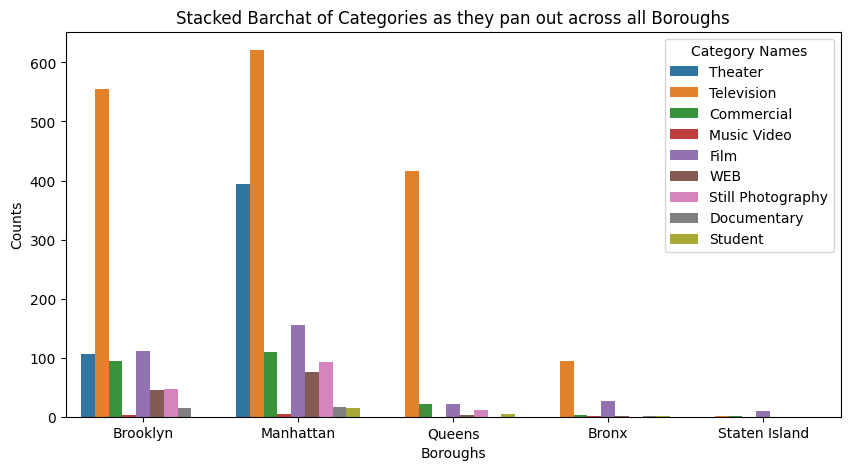

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='Borough', hue='Category')

plt.xlabel('Boroughs')
plt.ylabel('Counts')
plt.title('Stacked Barchat of Categories as they pan out across all Boroughs')
plt.legend(title='Category Names')
plt.show()